# Data Exploration all'interno del Database (SQLserver) con 'SQLAlchemy'

## 1. Connessione al database

In [1]:
import pyodbc
from sqlalchemy import create_engine
import pandas as pd

In [2]:
engine = create_engine('mssql+pyodbc://LAPTOP-3P1FOCLU\SQLEXPRESS/covid_19?driver=SQL Server Native Client 11.0?Trusted_Connection=yes')

In [4]:
connection = engine.connect()

In [5]:
engine.table_names()

['covid_deaths', 'covid_vaccinations']

## 2. Testare la connessione

In [6]:
data = pd.read_sql_query('SELECT * FROM covid_deaths' , connection)

In [7]:
data.sample(10)

,iso_code,continent,location,day_of_year,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
6965,ARG,South America,Argentina,2020-08-21,45195777.0,329043.0,8159.0,6658.000,6730.0,213.0,...,3.803,"1,12",NaN,None,None,None,None,None,None,None
24923,IRL,Europe,Ireland,2020-04-22,4937796.0,16671.0,631.0,589.143,769.0,39.0,...,9.403,"0,93",131.0,"26,53",778,"157,56",None,None,None,None
85696,LUX,Europe,Luxembourg,2020-06-02,625976.0,4020.0,1.0,3.571,110.0,0.0,...,0.000,"0,75",2.0,"3,195",22,"35,145",None,None,None,None
31772,COM,Africa,Comoros,2021-03-25,869595.0,3687.0,5.0,4.286,146.0,0.0,...,0.000,"0,89",NaN,None,None,None,None,None,None,None
54474,POL,Europe,Poland,2020-12-05,37846605.0,1054273.0,12427.0,11525.714,19861.0,502.0,...,11.758,"0,76",NaN,None,19895,"525,675",None,None,None,None
21406,AZE,Asia,Azerbaijan,2020-06-02,10139175.0,5935.0,273.0,218.857,71.0,3.0,...,0.268,"1,45",NaN,None,None,None,None,None,None,None
63471,BLR,Europe,Belarus,2021-05-30,9449321.0,393807.0,1178.0,1111.714,2841.0,10.0,...,1.058,"0,87",NaN,None,None,None,None,None,None,None
18061,NER,Africa,Niger,2020-12-23,24206636.0,2876.0,73.0,73.571,89.0,0.0,...,0.041,"1,13",NaN,None,None,None,None,None,None,None
66678,OMN,Asia,Oman,2020-06-30,5106622.0,40070.0,1010.0,1096.571,176.0,7.0,...,1.007,"1,1",NaN,None,None,None,None,None,None,None
89735,IDN,Asia,Indonesia,2021-03-23,273523621.0,1471225.0,5297.0,5823.857,39865.0,154.0,...,0.581,"0,93",NaN,None,None,None,None,None,None,None


## 3. Elaborare una "Reflection"

In [8]:
from sqlalchemy import Table, MetaData

In [9]:
# Inizializzare l'oggetto di classe MetaData
metadata = MetaData()

In [10]:
# Fare il "reflect" di una tabella
covid_deaths = Table('covid_deaths', metadata, autoload=True, autoload_with=engine)

In [11]:
# Ispezionare le colonne
covid_deaths.columns.keys()

['iso_code',
 'continent',
 'location',
 'day_of_year',
 'population',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million']

In [12]:
repr(covid_deaths)

"Table('covid_deaths', MetaData(bind=None), Column('iso_code', NVARCHAR(length=255), table=<covid_deaths>), Column('continent', NVARCHAR(length=255), table=<covid_deaths>), Column('location', NVARCHAR(length=255), table=<covid_deaths>), Column('day_of_year', DATETIME(), table=<covid_deaths>), Column('population', FLOAT(precision=53), table=<covid_deaths>), Column('total_cases', FLOAT(precision=53), table=<covid_deaths>), Column('new_cases', FLOAT(precision=53), table=<covid_deaths>), Column('new_cases_smoothed', FLOAT(precision=53), table=<covid_deaths>), Column('total_deaths', INTEGER(), table=<covid_deaths>), Column('new_deaths', INTEGER(), table=<covid_deaths>), Column('new_deaths_smoothed', FLOAT(precision=53), table=<covid_deaths>), Column('total_cases_per_million', FLOAT(precision=53), table=<covid_deaths>), Column('new_cases_per_million', FLOAT(precision=53), table=<covid_deaths>), Column('new_cases_smoothed_per_million', FLOAT(precision=53), table=<covid_deaths>), Column('total

## 4. Prime query 

In [13]:
# Query semplice en "raw SQL"
statement = 'SELECT TOP(10) * FROM covid_deaths'
results = connection.execute(statement).fetchall()
results

[('OWID_EUN', None, 'European Union', datetime.datetime(2021, 2, 7, 0, 0), 444919060.0, 20418116.0, 68143.0, 112026.0, 493667, 1425, 3220.714, 45891.754, 153.158, 251.79, '1109,566', '3,203', 7.239, None, None, None, None, None, None, None, None, None),
 ('OWID_EUN', None, 'European Union', datetime.datetime(2021, 2, 8, 0, 0), 444919060.0, 20502181.0, 84065.0, 106419.286, 496659, 2992, 3161.571, 46080.698, 188.944, 239.188, '1116,291', '6,725', 7.106, None, None, None, None, None, None, None, None, None),
 ('OWID_EUN', None, 'European Union', datetime.datetime(2021, 2, 9, 0, 0), 444919060.0, 20593535.0, 91354.0, 102879.857, 500809, 4150, 3112.714, 46286.026, 205.327, 231.233, '1125,618', '9,328', 6.996, None, None, None, None, None, None, None, None, None),
 ('OWID_EUN', None, 'European Union', datetime.datetime(2021, 2, 10, 0, 0), 444919060.0, 20709189.0, 115654.0, 99781.571, 504216, 3407, 3053.857, 46545.97, 259.944, 224.269, '1133,276', '7,658', 6.864, None, None, None, None, None, 

In [14]:
# Query semplice in "pythonic" SQL
from sqlalchemy import select

statement_2 = select([covid_deaths])
results_2 = connection.execute(statement_2).fetchmany(size=10)
results_2

[('OWID_EUN', None, 'European Union', datetime.datetime(2021, 2, 7, 0, 0), 444919060.0, 20418116.0, 68143.0, 112026.0, 493667, 1425, 3220.714, 45891.754, 153.158, 251.79, '1109,566', '3,203', 7.239, None, None, None, None, None, None, None, None, None),
 ('OWID_EUN', None, 'European Union', datetime.datetime(2021, 2, 8, 0, 0), 444919060.0, 20502181.0, 84065.0, 106419.286, 496659, 2992, 3161.571, 46080.698, 188.944, 239.188, '1116,291', '6,725', 7.106, None, None, None, None, None, None, None, None, None),
 ('OWID_EUN', None, 'European Union', datetime.datetime(2021, 2, 9, 0, 0), 444919060.0, 20593535.0, 91354.0, 102879.857, 500809, 4150, 3112.714, 46286.026, 205.327, 231.233, '1125,618', '9,328', 6.996, None, None, None, None, None, None, None, None, None),
 ('OWID_EUN', None, 'European Union', datetime.datetime(2021, 2, 10, 0, 0), 444919060.0, 20709189.0, 115654.0, 99781.571, 504216, 3407, 3053.857, 46545.97, 259.944, 224.269, '1133,276', '7,658', 6.864, None, None, None, None, None, 

In [15]:
# Selezionare una riga
first_row = results[0]

# Selezionare una colonna
first_row['location'] 

'European Union'

In [16]:
# Totali di morti per giorno in Italia
statement_3 = select([covid_deaths]).where(covid_deaths.columns.location == 'Italy')
result_3 = connection.execute(statement_3).fetchall()

for result in result_3:
    print(result.location, result.day_of_year, result.total_deaths)

Italy 2020-01-31 00:00:00 None
Italy 2020-02-01 00:00:00 None
Italy 2020-02-02 00:00:00 None
Italy 2020-02-03 00:00:00 None
Italy 2020-02-04 00:00:00 None
Italy 2020-02-05 00:00:00 None
Italy 2020-02-06 00:00:00 None
Italy 2020-02-07 00:00:00 None
Italy 2020-02-08 00:00:00 None
Italy 2020-02-09 00:00:00 None
Italy 2020-02-10 00:00:00 None
Italy 2020-02-11 00:00:00 None
Italy 2020-02-12 00:00:00 None
Italy 2020-02-13 00:00:00 None
Italy 2020-02-14 00:00:00 None
Italy 2020-02-15 00:00:00 None
Italy 2020-02-16 00:00:00 None
Italy 2020-02-17 00:00:00 None
Italy 2020-02-18 00:00:00 None
Italy 2020-02-19 00:00:00 None
Italy 2020-02-20 00:00:00 None
Italy 2020-02-21 00:00:00 1
Italy 2020-02-22 00:00:00 2
Italy 2020-02-23 00:00:00 3
Italy 2020-02-24 00:00:00 7
Italy 2020-02-25 00:00:00 10
Italy 2020-02-26 00:00:00 12
Italy 2020-02-27 00:00:00 17
Italy 2020-02-28 00:00:00 21
Italy 2020-02-29 00:00:00 29
Italy 2020-03-01 00:00:00 34
Italy 2020-03-02 00:00:00 52
Italy 2020-03-03 00:00:00 79
Italy

Italy 2021-05-06 00:00:00 122263
Italy 2021-05-07 00:00:00 122470
Italy 2021-05-08 00:00:00 122694
Italy 2021-05-09 00:00:00 122833
Italy 2021-05-10 00:00:00 123031
Italy 2021-05-11 00:00:00 123282
Italy 2021-05-12 00:00:00 123544
Italy 2021-05-13 00:00:00 123745
Italy 2021-05-14 00:00:00 123927
Italy 2021-05-15 00:00:00 124063
Italy 2021-05-16 00:00:00 124156
Italy 2021-05-17 00:00:00 124296
Italy 2021-05-18 00:00:00 124497
Italy 2021-05-19 00:00:00 124646
Italy 2021-05-20 00:00:00 124810
Italy 2021-05-21 00:00:00 125028
Italy 2021-05-22 00:00:00 125153
Italy 2021-05-23 00:00:00 125225
Italy 2021-05-24 00:00:00 125335
Italy 2021-05-25 00:00:00 125501
Italy 2021-05-26 00:00:00 125622
Italy 2021-05-27 00:00:00 125793
Italy 2021-05-28 00:00:00 125919
Italy 2021-05-29 00:00:00 126002
Italy 2021-05-30 00:00:00 126046
Italy 2021-05-31 00:00:00 126128
Italy 2021-06-01 00:00:00 126221
Italy 2021-06-02 00:00:00 126283
Italy 2021-06-03 00:00:00 126342
Italy 2021-06-04 00:00:00 126415
Italy 2021

In [17]:
# Morti in un giorno in Italia, Argentina e Stati Uniti
states = ['Italy', 'Argentina', 'United States']
statement_4 = select([covid_deaths]).where(covid_deaths.columns.location.in_(states))

for state in connection.execute(statement_4):
    print(state.location, state.day_of_year, state.total_deaths)

Argentina 2021-01-22 00:00:00 46575
Argentina 2021-01-23 00:00:00 46737
Argentina 2021-01-24 00:00:00 46827
Argentina 2021-01-25 00:00:00 47034
Argentina 2021-01-26 00:00:00 47253
Argentina 2021-01-27 00:00:00 47435
Argentina 2021-01-28 00:00:00 47601
Argentina 2021-01-29 00:00:00 47775
Argentina 2021-01-30 00:00:00 47931
Argentina 2021-01-31 00:00:00 47974
Argentina 2021-02-01 00:00:00 48249
Argentina 2021-02-02 00:00:00 48426
Argentina 2021-02-03 00:00:00 48539
Argentina 2021-02-04 00:00:00 48700
Argentina 2021-02-05 00:00:00 48985
Argentina 2021-02-06 00:00:00 49110
Argentina 2021-02-07 00:00:00 49171
Argentina 2021-02-08 00:00:00 49398
Argentina 2021-02-09 00:00:00 49566
Argentina 2021-02-10 00:00:00 49674
Argentina 2021-02-11 00:00:00 49874
Argentina 2021-02-12 00:00:00 50029
Argentina 2021-02-13 00:00:00 50188
Argentina 2021-02-14 00:00:00 50236
Argentina 2021-02-15 00:00:00 50327
Argentina 2021-02-16 00:00:00 50432
Argentina 2021-02-17 00:00:00 50616
Argentina 2021-02-18 00:00:0

Argentina 2020-12-05 00:00:00 39632
Argentina 2020-12-06 00:00:00 39770
Argentina 2020-12-07 00:00:00 39888
Argentina 2020-12-08 00:00:00 40009
Argentina 2020-12-09 00:00:00 40222
Argentina 2020-12-10 00:00:00 40431
Argentina 2020-12-11 00:00:00 40606
Argentina 2020-12-12 00:00:00 40668
Argentina 2020-12-13 00:00:00 40766
Argentina 2020-12-14 00:00:00 41041
Argentina 2020-12-15 00:00:00 41204
Argentina 2020-12-16 00:00:00 41365
Argentina 2020-12-17 00:00:00 41534
Argentina 2020-12-18 00:00:00 41672
Argentina 2020-12-19 00:00:00 41763
Argentina 2020-12-20 00:00:00 41813
Argentina 2020-12-21 00:00:00 41997
Argentina 2020-12-22 00:00:00 42254
Argentina 2020-12-23 00:00:00 42314
Argentina 2020-12-24 00:00:00 42314
Argentina 2020-12-25 00:00:00 42422
Argentina 2020-12-26 00:00:00 42501
Argentina 2020-12-27 00:00:00 42650
Argentina 2020-12-28 00:00:00 42868
Argentina 2020-12-29 00:00:00 43018
Argentina 2020-12-30 00:00:00 43163
Argentina 2020-12-31 00:00:00 43245
Argentina 2021-01-01 00:00:0

United States 2020-06-25 00:00:00 125232
United States 2020-06-26 00:00:00 125860
United States 2020-06-27 00:00:00 126363
United States 2020-06-28 00:00:00 126682
United States 2020-06-29 00:00:00 127068
United States 2020-06-30 00:00:00 127623
United States 2020-07-01 00:00:00 128325
United States 2020-07-02 00:00:00 129035
United States 2020-07-03 00:00:00 129705
United States 2020-07-04 00:00:00 130020
United States 2020-07-05 00:00:00 130346
United States 2020-07-06 00:00:00 130723
United States 2020-07-07 00:00:00 131884
United States 2020-07-08 00:00:00 132707
United States 2020-07-09 00:00:00 133727
United States 2020-07-10 00:00:00 134543
United States 2020-07-11 00:00:00 135272
United States 2020-07-12 00:00:00 135744
United States 2020-07-13 00:00:00 136192
United States 2020-07-14 00:00:00 137121
United States 2020-07-15 00:00:00 138095
United States 2020-07-16 00:00:00 139050
United States 2020-07-17 00:00:00 139975
United States 2020-07-18 00:00:00 140833
United States 20

United States 2021-04-06 00:00:00 557153
United States 2021-04-07 00:00:00 559745
United States 2021-04-08 00:00:00 560768
United States 2021-04-09 00:00:00 561659
United States 2021-04-10 00:00:00 562378
United States 2021-04-11 00:00:00 562680
United States 2021-04-12 00:00:00 563159
United States 2021-04-13 00:00:00 563994
United States 2021-04-14 00:00:00 564968
United States 2021-04-15 00:00:00 565872
United States 2021-04-16 00:00:00 566742
United States 2021-04-17 00:00:00 567439
United States 2021-04-18 00:00:00 567776
United States 2021-04-19 00:00:00 568279
United States 2021-04-20 00:00:00 569119
United States 2021-04-21 00:00:00 569977
United States 2021-04-22 00:00:00 570941
United States 2021-04-23 00:00:00 571724
United States 2021-04-24 00:00:00 572473
United States 2021-04-25 00:00:00 572765
United States 2021-04-26 00:00:00 573260
United States 2021-04-27 00:00:00 573915
United States 2021-04-28 00:00:00 574881
United States 2021-04-29 00:00:00 575752
United States 20

Italy 2020-12-05 00:00:00 59514
Italy 2020-12-06 00:00:00 60078
Italy 2020-12-07 00:00:00 60606
Italy 2020-12-08 00:00:00 61240
Italy 2020-12-09 00:00:00 61739
Italy 2020-12-10 00:00:00 62626
Italy 2020-12-11 00:00:00 63387
Italy 2020-12-12 00:00:00 64036
Italy 2020-12-13 00:00:00 64520
Italy 2020-12-14 00:00:00 65011
Italy 2020-12-15 00:00:00 65857
Italy 2020-12-16 00:00:00 66537
Italy 2020-12-17 00:00:00 67220
Italy 2020-12-18 00:00:00 67894
Italy 2020-12-19 00:00:00 68447
Italy 2020-12-20 00:00:00 68799
Italy 2020-12-21 00:00:00 69214
Italy 2020-12-22 00:00:00 69842
Italy 2020-12-23 00:00:00 70395
Italy 2020-12-24 00:00:00 70900
Italy 2020-12-25 00:00:00 71359
Italy 2020-12-26 00:00:00 71620
Italy 2020-12-27 00:00:00 71925
Italy 2020-12-28 00:00:00 72370
Italy 2020-12-29 00:00:00 73029
Italy 2020-12-30 00:00:00 73604
Italy 2020-12-31 00:00:00 74159
Italy 2021-01-01 00:00:00 74621
Italy 2021-01-02 00:00:00 74985
Italy 2021-01-03 00:00:00 75332
Italy 2021-01-04 00:00:00 75680
Italy 20

In [18]:
# Giorni con più di 500 morti in Italia in ordine decrescente
from sqlalchemy import and_, desc

statement_5 = select([covid_deaths]).where(
    and_(covid_deaths.columns.location == 'Italy',
         covid_deaths.columns.new_deaths >= 500
        )
)
statement_5 = statement_5.order_by(desc(covid_deaths.columns.new_deaths), covid_deaths.columns.day_of_year)

for result in connection.execute(statement_5):
    print(result.location, result.day_of_year, result.new_deaths)

Italy 2020-12-03 00:00:00 993
Italy 2020-03-27 00:00:00 919
Italy 2020-03-28 00:00:00 889
Italy 2020-12-10 00:00:00 887
Italy 2020-11-24 00:00:00 853
Italy 2020-12-15 00:00:00 846
Italy 2020-03-31 00:00:00 837
Italy 2020-11-27 00:00:00 827
Italy 2020-11-26 00:00:00 822
Italy 2020-12-04 00:00:00 814
Italy 2020-03-30 00:00:00 812
Italy 2020-03-21 00:00:00 793
Italy 2020-12-01 00:00:00 785
Italy 2020-04-03 00:00:00 766
Italy 2020-12-11 00:00:00 761
Italy 2020-04-02 00:00:00 760
Italy 2020-03-29 00:00:00 756
Italy 2020-11-18 00:00:00 753
Italy 2020-03-24 00:00:00 743
Italy 2020-11-17 00:00:00 731
Italy 2020-04-01 00:00:00 727
Italy 2020-11-25 00:00:00 722
Italy 2021-04-09 00:00:00 718
Italy 2020-03-26 00:00:00 712
Italy 2020-11-20 00:00:00 699
Italy 2020-11-21 00:00:00 692
Italy 2020-11-28 00:00:00 686
Italy 2020-12-02 00:00:00 684
Italy 2020-03-25 00:00:00 683
Italy 2020-12-17 00:00:00 683
Italy 2020-04-04 00:00:00 681
Italy 2020-12-16 00:00:00 680
Italy 2020-12-18 00:00:00 674
Italy 2020

In [19]:
# Numero di 'location' diverse
from sqlalchemy import func

statement_6 = func.count(covid_deaths.columns.location.distinct())
result_6 = connection.execute(statement_6).scalar()
result_6

229

In [22]:
# Numero di morti per paese
statement_7 = select([covid_deaths.columns.location, func.max(covid_deaths.columns.total_deaths)])
statement_7 = statement_7.group_by(covid_deaths.columns.location)

for result in connection.execute(statement_7):
    print(result.location, result.max_total_deaths)

AttributeError: Could not locate column in row for column 'max_total_deaths'

## 5. Andamento della pandemia in Italia

In [23]:
#statement_3 = select([covid_deaths]).where(covid_deaths.columns.location == 'Italy')
#result_3 = connection.execute(statement_3)

# Trasformare la query in un DataFrame
df = pd.DataFrame(result_3)
df.columns = result_3[0].keys()
df

,iso_code,continent,location,day_of_year,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
0,ITA,Europe,Italy,2020-01-31,60461828.0,2.0,2.0,NaN,NaN,NaN,...,NaN,None,NaN,None,None,None,None,None,None,None
1,ITA,Europe,Italy,2020-02-01,60461828.0,2.0,0.0,NaN,NaN,NaN,...,NaN,None,NaN,None,None,None,None,None,None,None
2,ITA,Europe,Italy,2020-02-02,60461828.0,2.0,0.0,NaN,NaN,NaN,...,NaN,None,NaN,None,None,None,None,None,None,None
3,ITA,Europe,Italy,2020-02-03,60461828.0,2.0,0.0,NaN,NaN,NaN,...,NaN,None,NaN,None,None,None,None,None,None,None
4,ITA,Europe,Italy,2020-02-04,60461828.0,2.0,0.0,NaN,NaN,NaN,...,NaN,None,NaN,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,ITA,Europe,Italy,2021-06-03,60461828.0,4225163.0,1963.0,2741.857,126342.0,59.0,...,1.297,"0,64",NaN,None,None,None,None,None,None,None
490,ITA,Europe,Italy,2021-06-04,60461828.0,4227719.0,2556.0,2573.143,126415.0,73.0,...,1.172,"0,65",NaN,None,None,None,None,None,None,None
491,ITA,Europe,Italy,2021-06-05,60461828.0,4230153.0,2434.0,2442.571,126472.0,57.0,...,1.110,"0,66",NaN,None,None,None,None,None,None,None
492,ITA,Europe,Italy,2021-06-06,60461828.0,4232428.0,2275.0,2346.429,126523.0,51.0,...,1.127,"0,67",NaN,None,None,None,None,None,None,None


<ipython-input-24-0ffc9bf45991>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels('Data', rotation=45)


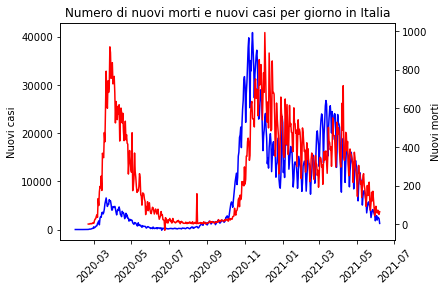

In [24]:
# Costruire un grafico
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(df.day_of_year, df.new_cases, color='b')
ax.set_xticklabels('Data', rotation=45)
ax.set_ylabel('Nuovi casi')
ax2 = ax.twinx()
ax2.plot(df.day_of_year, df.new_deaths, color='r')
ax2.set_ylabel('Nuovi morti')
plt.title('Numero di nuovi morti e nuovi casi per giorno in Italia')
plt.show()

## 6. Unire tabelle

In [27]:
# Fare il reflecte della tabella 'covid_vaccinations'
metadata_1 = MetaData()
covid_vaccinations = Table('covid_vaccinations', metadata_1, autoload=True, autoload_with=engine)
covid_vaccinations.columns.keys()

['iso_code',
 'continent',
 'location',
 'day_of_year',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'new_vaccinations_smoothed_per_million',
 'stringency_index',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_thousand',
 'life_expectancy',
 'human_development_index']

In [51]:
# Fare una join per confrontare l'andamento di nuovi casi e nuovi vaccinati in Italia
statement_8 = select([covid_deaths.columns.location,
                      covid_deaths.columns.day_of_year,
                      covid_deaths.columns.new_cases,
                      covid_vaccinations.columns.new_vaccinations]).select_from(
    covid_deaths.join(covid_vaccinations, covid_deaths.columns.iso_code == covid_vaccinations.columns.iso_code)
)
statement_8 = statement_8.where(covid_deaths.columns.location == 'Italy')
result_8 = connection.execute(statement_8).fetchall()
df_1 = pd.DataFrame(result_8)
df_1.columns = result_8[0].keys()

In [52]:
# Salvare i dati estratti come file excel
df_1.to_excel(r'C:\Users\Santiago\Desktop\data_science\Projects\covid\join.xlsx', index=True)